# parsing configuration file

In [2]:
import configparser
confParser = configparser.ConfigParser()

In [3]:
#--- parse conf. file
confParser.read('configuration.ini')
print('conf. file sections:',confParser.sections())

#--- set dynamic parameters
temp=confParser['parameters']['temperature']
load=confParser['parameters']['load']

#--- edit list of input files
confParser.set('input files','dump file',''.join([
               'allconf ', #0
              ]))
confParser.set('input files','diffusion file',''.join([
               'Diffusion.dat ', #0
              ]))


conf. file sections: ['parameters', 'flags', 'neigh list', 'dislocation analysis', 'input files', 'Atomic Radius']


# import libraries

In [4]:
import sys
sys.path.append(confParser['input files']['lib_path'])

#--- system libraries
import pdb
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
import traceback
import os
import scipy.interpolate as scp_int
import warnings
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import patches
import sys
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import patsy
from sklearn import linear_model, mixture
import sklearn.mixture as skm
from scipy import optimize
import scipy
import re
from functools import reduce
import time
import fnmatch

#
warnings.filterwarnings('ignore')

#--- user modules
import LammpsPostProcess as lp
import LammpsPostProcess2nd as lpp
import utilityy as utll
import utility as utl
from utility import *
import imp
imp.reload(lp)
imp.reload(lpp)
imp.reload(utl)
imp.reload(utll)

<module 'utilityy' from '/Users/Home/Desktop/Tmp/txt/git/vacancyDiffusion/postproc/../../HeaDef/postprocess/utilityy.py'>

In [5]:
class Symbols:
    def __init__(self):
        self.colors = ['black','red','green','blue','cyan','brown','grey','magenta','orange','yellow']
        self.fillstyles=['white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None,'white',None]
        self.markers=['o','s','D','^','<','>','v']
        self.markersizes=[10,10,10,12,12,12,10]
        self.nmax=7
        
    def GetAttrs(self,count=0,label='',nevery=1,fmt='.-',zorder=1):
        if count > self.nmax:
            print('index out of list bound!')
            return 
        attrs={ 'color':self.colors[count],
            'markersize':self.markersizes[count],
            'marker':self.markers[count],
            'markerfacecolor':self.colors[count],
            'markeredgecolor':'white', #'black' if not self.fillstyles[count] else None,
            'label':label,
           'markevery':nevery,
           'errorevery':nevery,
           'markeredgewidth':1.75,
            'linewidth':1, 
           'barsabove':None,
           'capsize':5,
           'capthick':1,
           'elinewidth':1,
           'fmt':fmt,
             'zorder':zorder,
         }
        return attrs
    
    def GetAttrs2nd(self,count=0,label='',nevery=1,fmt='.-',zorder=1):
        if count > self.nmax:
            print('index out of list bound!')
            return 
        attrs={ 'color':self.colors[count],
            'markersize':self.markersizes[count],
            'marker':self.markers[count],
            'markerfacecolor':'white',
#            'markeredgecolor':'black' if not self.fillstyles[count] else None,
            'label':label,
           'markevery':nevery,
           'errorevery':nevery,
           'markeredgewidth':1.75,
            'linewidth':1, 
           'barsabove':None,
           'capsize':5,
           'capthick':1,
           'elinewidth':1,
           'fmt':fmt,
            'zorder':zorder,
          }
        return attrs

class Legends:
    def __init__(self
                ):
        pass
    def Set(self,fontsize=20,
                 labelspacing=0,
                 **kwargs
#                 bbox_to_anchor=(0.5,0.48,0.5,0.5),
           ):
        self.attrs = {'frameon':False,'fontsize':fontsize,
                   'labelspacing':labelspacing,
                      'handletextpad':.2,
                   'handlelength':1,
                    **kwargs,
                     }
    def Get(self):
        return self.attrs
    
if not eval(confParser['flags']['RemoteMachine']):
    matplotlib.rcParams['text.usetex'] = True #--- comment tex stuff!


# Dump File

In [6]:
!mkdir dumpFile

#--- fetch parameters
path = confParser['input files']['input_path']
indx = confParser['input files']['fileIndex']
dumpFile = '%s/%s'%(path,confParser['input files']['dump file'].split()[int(indx)])
datFile = '%s/%s'%(path,confParser['input files']['diffusion file'].split()[int(indx)])
nevery = int(confParser['parameters']['nevery'])
lib_path = confParser['input files']['lib_path']
outpt = 'dumpFile/dump.xyz'

#--- parse dump: call ovito
t0=time.time()
!ovitos $lib_path/OvitosCna.py $dumpFile $outpt $nevery 7
print('output dump file=%s s'%(time.time()-t0))


#--- parse dump files
print('parsing %s'%(outpt))
lmpData = lp.ReadDumpFile( '%s'%(outpt) ) 
lmpData.GetCords( ncount = sys.maxsize, 
                )
print('time steps:',lmpData.coord_atoms_broken.keys())
display(lmpData.coord_atoms_broken[0].head())

#--- add timescales
lmpData.times = np.loadtxt(datFile)[:,0]



mkdir: dumpFile: File exists
InputFile= ../simulations/NiNatom16KTemp1400K/Run0/allconf
num_frames= 201
frame=0
frame=1
frame=2
frame=3
frame=4
frame=5
frame=6
frame=7
frame=8
frame=9
frame=10
frame=11
frame=12
frame=13
frame=14
frame=15
frame=16
frame=17
frame=18
frame=19
frame=20
frame=21
frame=22
frame=23
frame=24
frame=25
frame=26
frame=27
frame=28
frame=29
frame=30
frame=31
frame=32
frame=33
frame=34
frame=35
frame=36
frame=37
frame=38
frame=39
frame=40
frame=41
frame=42
frame=43
frame=44
frame=45
frame=46
frame=47
frame=48
frame=49
frame=50
frame=51
frame=52
frame=53
frame=54
frame=55
frame=56
frame=57
frame=58
frame=59
frame=60
frame=61
frame=62
frame=63
frame=64
frame=65
frame=66
frame=67
frame=68
frame=69
frame=70
frame=71
frame=72
frame=73
frame=74
frame=75
frame=76
frame=77
frame=78
frame=79
frame=80
frame=81
frame=82
frame=83
frame=84
frame=85
frame=86
frame=87
frame=88
frame=89
frame=90
frame=91
frame=92
frame=93
frame=94
frame=95
frame=96
frame=97
frame=98
frame=99
frame=

,id,type,x,y,z
0,1,1,7.614650,28.653929,46.186661
1,2,1,39.173443,9.368440,51.445854
2,3,1,46.186600,28.653833,39.173592
3,4,1,46.186661,37.420292,33.913750
4,5,1,49.693207,35.667023,35.667023


In [296]:
def AddRndStrs(df):
    df['sxx']=np.random.normal(size=len(df))
    df['syy']=np.random.normal(size=len(df))
    df['szz']=np.random.normal(size=len(df))

#--- add random stress
#list( map(lambda x:AddRndStrs(lmpData.coord_atoms_broken[x]),lmpData.coord_atoms_broken.keys()) )


[None, None]

## stress response

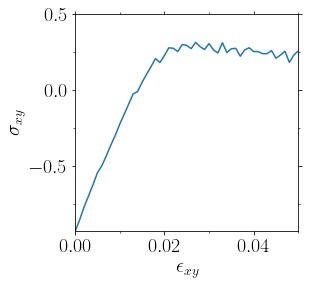

In [29]:
def GetStrsStrain( lmpData, col='sxy' ):

#     fig = plt.figure( figsize = (4,4))
#     ax = fig.add_subplot(111)
#     ax.set_xlabel(r'$\epsilon_{xy}$',fontsize=16)
#     ax.set_ylabel(r'$%s$(Gpa)'%col,fontsize=16)
#     ax.tick_params(labelsize=16)
    #
    #--- point corresponding to strain maps
    Box = {}
    strainDump = []
    Virial = []
    times = lmpData.coord_atoms_broken.keys()
    for itimee in sorted(times):

        #--- extract atom and box properties
        atoms = lp.Atoms( **lmpData.coord_atoms_broken[itimee].to_dict(orient='list') )
        #
        Box[itimee] = lp.Box( BoxBounds = lmpData.BoxBounds[itimee], AddMissing = np.array([0.0,0.0,0.0] ))
        #
        box0 = lp.Box( BoxBounds = lmpData.BoxBounds[0], AddMissing = np.array([0.0,0.0,0.0] ) ) #--- reference state

        #--- volume
        CellVectorOrtho, VectorNorm = lp.GetOrthogonalBasis( Box[itimee].CellVector )
        volume = np.linalg.det( CellVectorOrtho )

        #--- virial stress
        try: 
            virial = np.sum(atoms[col]) / volume
        except: #--- dump file has no stress entry! 
            if col == 'p':
                virial = -(np.sum(atoms['sxx'])+np.sum(atoms['syy'])+np.sum(atoms['szz'])) / 3.0 / volume
            ReadStrsFromDump = False

        #--- bulk strain
        dx=Box[itimee].CellVector[0,1]-box0.CellVector[0,1]
        l1=Box[itimee].CellVector[1,1]
        ebulk = dx/l1    

        #--- append
        strainDump += [ebulk]
        Virial += [virial*1e-4] #--- bar to gpa 

            #
#     ax.set_xlim(0,0.05)
#     ax.set_ylim(Virial[0],0.5)
#     ax.plot(
# #        sorted(times),
#          0.5*np.array(strainDump),
#         Virial, '-')
#     #
#     plt.savefig('stress.png',dpi=75,bbox_inches='tight',pad_inches=0.0)
#     plt.show()
    #
    return np.array(strainDump), Virial
    
if eval(confParser['flags']['StrsCurve']):
    strain, stress = GetStrsStrain( lmpData,
                  col='sxy',
                 )
    utl.PltErr(0.5*strain,stress,
               attrs={'fmt':'-'},
              xlim=(0,0.05),
               ylim=(stress[0],0.5),
               xstr=r'$\epsilon_{xy}$',
               ystr=r'$\sigma_{xy}$',
               title='stress.png'
              )

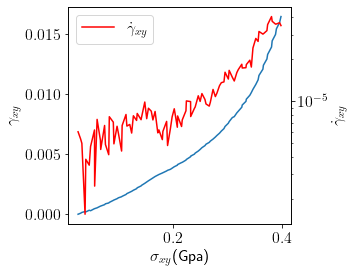

In [14]:
def GetStrsStrain( lmpData, col='sxy' ):

    fig = plt.figure( figsize = (4,4))
    ax = fig.add_subplot(111)
    ax2=ax.twinx()
    #
    ax.set_xlabel(r'$\sigma_{xy}$(Gpa)',fontsize=16)
    ax2.set_ylabel(r'$\dot\gamma_{xy}$',fontsize=16)
    ax.set_ylabel(r'$\gamma_{xy}$',fontsize=16)
    #
    ax2.set_yscale('log')
    #
    ax.tick_params(labelsize=16)
    ax2.tick_params(labelsize=16)
    #
    #--- point corresponding to strain maps
    Box = {}
    strainDump = []
    Virial = []
    times = lmpData.coord_atoms_broken.keys()
    for itimee in sorted(times):

        #--- extract atom and box properties
        atoms = lp.Atoms( **lmpData.coord_atoms_broken[itimee].to_dict(orient='list') )
        #
        Box[itimee] = lp.Box( BoxBounds = lmpData.BoxBounds[itimee], AddMissing = np.array([0.0,0.0,0.0] ))
        #
        box0 = lp.Box( BoxBounds = lmpData.BoxBounds[0], AddMissing = np.array([0.0,0.0,0.0] ) ) #--- reference state

        #--- volume
        CellVectorOrtho, VectorNorm = lp.GetOrthogonalBasis( Box[itimee].CellVector )
        volume = np.linalg.det( CellVectorOrtho )

        #--- virial stress
        try: 
            virial = np.sum(atoms[col]) / volume
        except: #--- dump file has no stress entry! 
            if col == 'p':
                virial = -(np.sum(atoms['sxx'])+np.sum(atoms['syy'])+np.sum(atoms['szz'])) / 3.0 / volume
            ReadStrsFromDump = False
    #        virial = -(np.sum(atoms.sxx)+np.sum(atoms.syy)+np.sum(atoms.szz)) / 3.0 / volume

        #--- bulk strain
        dx=Box[itimee].CellVector[0,1]-box0.CellVector[0,1]
        l1=Box[itimee].CellVector[1,1]
        ebulk = dx/l1    

        #--- append
        strainDump += [ebulk]
        Virial += [virial*1e-4] #--- bar to gpa 

            #
    ax.plot(
            sorted(Virial),
            strainDump, '-',label=r'$\gamma_{xy}$')
    ax2.plot(
            sorted(Virial),
            np.gradient(strainDump,sorted(times)), 
            '-',color='red',label=r'$\dot\gamma_{xy}$')
    #
    plt.legend(fontsize=16)
    #
    plt.savefig('stress.png',dpi=75,bbox_inches='tight',pad_inches=0.0)
    plt.show()
    #

if eval(confParser['flags']['StrsCurve']):
    GetStrsStrain( lmpData,
              col='sxy',
             )


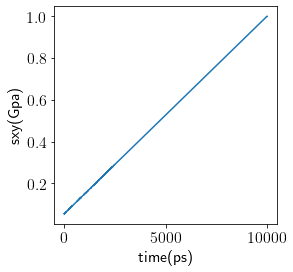

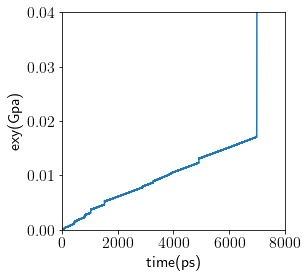

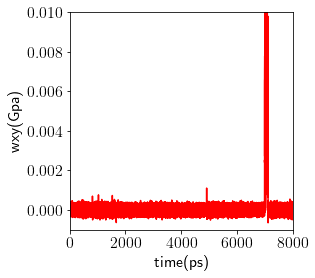

In [8]:
def GetStrsStrain( filee, xcol, ycol, **kwargs ):
    fig = plt.figure( figsize = (4,4))
    ax = fig.add_subplot(111)
    #
    ax.set_xlabel(r'%s(ps)'%xcol,fontsize=16)
    ax.set_ylabel(r'%s(Gpa)'%ycol,fontsize=16)
    #
    ax.tick_params(labelsize=16)
    #
    if 'xlim' in kwargs:
        ax.set_xlim(kwargs['xlim'])
    #
    if 'ylim' in kwargs:
        ax.set_ylim(kwargs['ylim'])
    #
    if 'xscale' in kwargs:
        ax.set_xscale(kwargs['xscale'])
    if 'yscale' in kwargs:
        ax.set_yscale(kwargs['yscale'])
    #
    df = pd.read_csv(filee,sep=' ')
    try:
        ax.plot(
                df[xcol],
                df[ycol], '-')
    except:
        if ycol == 'wxy':
            ax.plot(
                    df[xcol],
                    np.gradient(df['exy'],df['time']), 
                    '-',color='red',label=r'$\dot\gamma_{xy}$')
    #
    plt.savefig('stress.png',dpi=75,bbox_inches='tight',pad_inches=0.0)
    plt.show()

if eval(confParser['flags']['StrsCurve']):

    GetStrsStrain( '%s/temperature.txt'%path,
                   xcol = 'time',
                   ycol = 'sxy',

                 )

    GetStrsStrain( '%s/temperature.txt'%path,
                   xcol = 'time',
                   ycol = 'exy',
                  xlim=np.array([0.0,.8])*10000,
                  ylim=[0.0,0.04]             
                 )

    GetStrsStrain( '%s/temperature.txt'%path,
                   xcol = 'time',
                   ycol = 'wxy',
                  xlim=np.array([0.0,0.8])*10000,
                  ylim=[-1e-3,1e-2],
                  xscale = 'linear', yscale = 'linear',
                 )

## parse data

In [73]:
#itimee=np.sum(list(lmpData.coord_atoms_broken.keys())) #--- only two timesteps:[0,ntime]
itimee=list(lmpData.coord_atoms_broken.keys())[-1] #--- only two timesteps:[0,ntime]
atomsRf = lp.Atoms( **lmpData.coord_atoms_broken[0].to_dict(orient='series') )
atoms = lp.Atoms( **lmpData.coord_atoms_broken[itimee].to_dict(orient='series') )
    #
box = lp.Box( BoxBounds = lmpData.BoxBounds[itimee],AddMissing = np.array([0.0,0.0,0.0] ) )
#box.BasisVectors( AddMissing = np.array([0.0,0.0,0.0] ))
    
display(pd.DataFrame(atoms.__dict__).head())
pd.DataFrame(atomsRf.__dict__).head()


,x,y,z,id,type,sxx,syy,szz
0,759.118,0.000024,130.658000,1,2,-1.357704,-1.937690,-1.789042
1,759.118,2.053570,2.748980,2,2,0.267779,0.197274,-0.254791
2,759.118,4.107130,1.281910,3,2,-0.176395,-1.471237,-0.523178
3,760.378,2.053570,0.621057,4,3,0.244517,-0.317857,0.456492
4,760.378,4.107130,3.475060,5,1,0.805389,0.239947,1.052140


,x,y,z,id,type,sxx,syy,szz
0,0.00000,0.00000,0.065458,1,2,-1.123136,-0.340794,-0.851273
1,0.00000,2.05355,2.844020,2,2,-1.780600,1.228752,1.590494
2,0.00000,4.10711,1.376950,3,2,-0.147734,-0.540406,1.601411
3,1.25962,2.05355,0.716095,4,3,0.144675,-0.449206,-0.448972
4,1.25962,4.10711,3.570100,5,1,-0.122598,-0.171723,-1.372653


## removed atom

In [10]:
# atom_id=np.sum(atomsRf.id)-np.sum(atoms.id)
# print('atom_id=',atom_id)
# zz=pd.DataFrame(atomsRf.__dict__)[pd.DataFrame(atomsRf.__dict__)['id']==atom_id]['z'].iloc[0]

In [11]:
# PrintOvito( pd.DataFrame(atomsDiff.__dict__), 
#             open( 'strsDiff.xyz','w'), 
#             footer = 'ITIME=%s'%itimee,
#             attr_list=['id','type','x','y','z','sxx' ,'syy' ,'szz' ,'sxy' ,'sxz' ,'syz'] )

# Displacements

In [7]:
def WrapperDisp(lmpData,reference_frames,current_frames):
    '''
    invoke disp analysis in ovito
    '''
    #--- split dump file
    for ii0, ii in zip(reference_frames,current_frames):
        atom_current = lp.Atoms(**lmpData.coord_atoms_broken[ii])
        atom_reference = lp.Atoms(**lmpData.coord_atoms_broken[ii0])
        box  = lp.Box( BoxBounds = lmpData.BoxBounds[ii],  AddMissing = np.array([0.0,0.0,0.0] ))
        box0 = lp.Box( BoxBounds = lmpData.BoxBounds[ii0], AddMissing = np.array([0.0,0.0,0.0] ))
        lpp.WriteDumpFile(atom_current, box).Write('disp/dump_curr.xyz', itime = ii,
                 attrs=['id', 'type','x', 'y', 'z'],
                 fmt='%i %i %15.14e %15.14e %15.14e')
        lpp.WriteDumpFile(atom_reference, box0).Write('disp/dump_ref.xyz', itime=ii0,
                 attrs=['id', 'type','x', 'y', 'z'],
                 fmt='%i %i %15.14e %15.14e %15.14e')
    #    os.system('tar czf dump.gz dump.xyz')
        fileCurr = 'disp/dump_curr.xyz'
        fileRef = 'disp/dump_ref.xyz'
        output = 'disp/disp.%s.xyz'%ii
        #--- load to ovito
        os.system('ovitos %s/OvitosCna.py %s %s 2 8 %s'%(lib_path,fileCurr,output,fileRef))
        #--- concat
        os.system('cat %s >> disp/disp.xyz;rm %s'%(output,output))
        
        
        

!mkdir disp

#--- fetch parameters
nevery = int(confParser['parameters']['nevery'])
lib_path = confParser['input files']['lib_path']
outpt = 'disp/disp.xyz'
!rm $outpt

current_frames = np.array(list(lmpData.coord_atoms_broken.keys()))[::2] #--- ignore half steps
current_frames.sort()
print('current_frames=',current_frames)
#--- reference
reference_frames = [current_frames[0]]*len(current_frames)
print('reference_frames=',reference_frames)
    
    
#--- call ovito
WrapperDisp(lmpData,reference_frames,current_frames)


#--- parse dump files
print('parsing %s'%(outpt))
lmpDisp = lp.ReadDumpFile( 'disp/disp.xyz' )
lmpDisp.GetCords( ncount = sys.maxsize )
display(lmpDisp.coord_atoms_broken[0].head())


mkdir: disp: File exists
rm: disp/disp.xyz: No such file or directory
current_frames= [  0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34
  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70
  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100 102 104 106
 108 110 112 114 116 118 120 122 124 126 128 130 132 134 136 138 140 142
 144 146 148 150 152 154 156 158 160 162 164 166 168 170 172 174 176 178
 180 182 184 186 188 190 192 194 196 198 200]
reference_frames= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr.xyz
num_frames= 1
frame=0
InputFile= disp/dump_curr

,id,type,x,y,z,DisplacementX,DisplacementY,DisplacementZ
0,1,1,7.614650,28.653929,46.186661,0.0,0.0,0.0
1,2,1,39.173443,9.368440,51.445854,0.0,0.0,0.0
2,3,1,46.186600,28.653833,39.173592,0.0,0.0,0.0
3,4,1,46.186661,37.420292,33.913750,0.0,0.0,0.0
4,5,1,49.693207,35.667023,35.667023,0.0,0.0,0.0


## msd vs. time

In [91]:
class MsDisp:
    
    def __init__(self, lmpDisp):
        self.disp = lmpDisp.coord_atoms_broken
        
        self.times = list(lmpDisp.coord_atoms_broken.keys())
        self.times.sort()
    
    def Get(self):
        msd = list(map(lambda x:(self.disp[x]['DisplacementX']**2+\
                     self.disp[x]['DisplacementY']**2+\
                     self.disp[x]['DisplacementZ']**2).mean(),
                self.times))
        return np.array(msd)
        

    def WindowAverage(self,ttime,bins_per_decade=4):
        for shift in range(1,len(self.times)-1):
    #        shift = 1 #--- time index  shift
            dt = zip(self.times,self.times[shift:]) #--- time tuples
            dt_real = list(map(lambda x: x[1]-x[0], zip(ttime,ttime[shift:]))) #--- real time difference
            disp = list(map(lambda x: ((self.disp[x[1]]['DisplacementX']-self.disp[x[0]]['DisplacementX'])**2+\
                          (self.disp[x[1]]['DisplacementY']-self.disp[x[0]]['DisplacementY'])**2+\
                          (self.disp[x[1]]['DisplacementZ']-self.disp[x[0]]['DisplacementZ'])**2).mean(),
                zip(self.times,self.times[shift:])))
            
#            print(np.c_[dt_real,disp].shape)
            if shift == 1:
                tr_mat=np.c_[dt_real,disp]
            else:    
                tr_mat = np.concatenate([tr_mat,np.c_[dt_real,disp]],axis=0)
                
                
                
        #--- binning
        xmin = 0.99*tr_mat[:,0].min()
        xmax = 1.01*tr_mat[:,0].max()
        n_decades = int(np.ceil(np.log10(xmax/xmin)))
        bins = np.logspace(np.log10(xmin),np.log10(xmax),n_decades*bins_per_decade)
        #
        ysum, edges = np.histogram(tr_mat[:,0],bins=bins,weights=tr_mat[:,1])
        ysum_sq, edges = np.histogram(tr_mat[:,0],bins=bins,weights=tr_mat[:,1]*tr_mat[:,1])
        xsum, edges = np.histogram(tr_mat[:,0],bins=bins,weights=tr_mat[:,0])
        count, edges = np.histogram(tr_mat[:,0],bins=bins)
        #
        filtr = count > 1
        ysum = ysum[filtr]
        ysum_sq = ysum_sq[filtr]
        xsum = xsum[filtr]
        count = count[filtr]
        assert not np.any(count == 0), 'incerease bin size!'
        #
        ysum_sq /= count
        ysum /= count
        xsum /= count
        ysum_sq -= (ysum * ysum)
#        assert not np.any(ysum_sq < 0.0), 'print %s'%ysum_sq
        
        return np.c_[xsum,ysum,(ysum_sq/count)**0.5]

msd = MsDisp( lmpDisp )
ans = msd.WindowAverage(lmpData.times,bins_per_decade=4)

!mkdir msd
with open('msd/msd.txt','w') as fp:
    np.savetxt(fp,ans,header='t\tmsd\terr')

mkdir: msd: File exists


mkdir: png: File exists


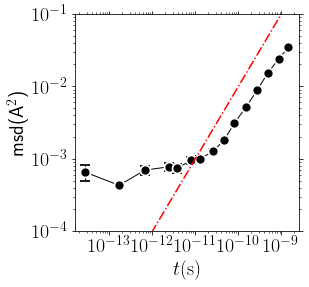

<AxesSubplot:xlabel='$t\\mathrm{(s)}$', ylabel='msd(A$^2$)'>

In [93]:
!mkdir png
symbols=utl.Symbols()
ax = utl.PltErr(ans[:,0],
                1e8*ans[:,0],
                attrs={'fmt':'-.r'},Plot=False)

utl.PltErr(ans[:,0],ans[:,1],
           yerr=ans[:,2],
           ax = ax,
           attrs=symbols.GetAttrs(count=0),
           Plot=False,
          )
utl.PltErr(None,#lmpData.times[1:],
           None, #msd.Get()[1:],
          xscale='log',
          yscale='log',
           attrs={'fmt':'-'},
           ax=ax,
           ylim=(1e-4,1e-1),
           xstr=r'$t\mathrm{(s)}$',
           ystr=r'msd(A$^2$)',
           title='png/msd.png'
          )